<a href="https://colab.research.google.com/github/NathanDelgadillo/AAI2026/blob/main/Module_3_pt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Dataset source:
# Kaggle - Telco Customer Churn Dataset
# https://www.kaggle.com/datasets/blastchar/telco-customer-churn


In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


# 2️⃣ Clean TotalCharges

In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()

# 3️⃣ Select numerical features for clustering

In [4]:
features = ["tenure", "MonthlyCharges", "TotalCharges"]
X = df[features]

# 4️⃣ Scale the data (required by rubric)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Create Elbow Plot

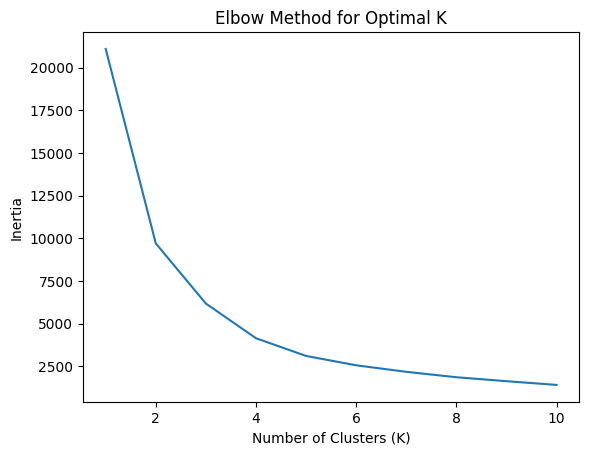

In [6]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# 6️⃣ Choose K (example: 3 clusters)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# 7️⃣ Analyze clusters

In [8]:
cluster_summary = df.groupby("Cluster")[features].mean()
print("\nCluster Averages:")
print(cluster_summary)


Cluster Averages:
            tenure  MonthlyCharges  TotalCharges
Cluster                                         
0        29.620642       26.632241    815.255649
1        58.570323       89.743719   5249.427014
2        13.262668       74.965760   1031.878782




# 8️⃣ Save results to CSV (required by rubric)

In [10]:
df.to_csv("customer_segments.csv", index=False)

For Part 3, I applied K-Means clustering to segment customers based on tenure, MonthlyCharges, and TotalCharges. Before clustering, I scaled the numerical features using StandardScaler to ensure all variables were on the same scale. I created an elbow plot to determine the optimal number of clusters by plotting inertia values for K ranging from 1 to 10. The elbow appeared around K = 3, where the rate of decrease in inertia slowed significantly, so I selected three clusters.

After applying K-Means, I analyzed the average characteristics of each cluster. The clusters showed distinct customer groups based on spending and tenure. For example, one cluster consisted of long-tenure, high-spending customers, while another cluster included newer customers with lower total charges.

Businesses can use these clusters to design targeted marketing strategies. High-value long-term customers may benefit from loyalty rewards, while newer customers may require onboarding incentives or promotional offers to increase retention. Segmenting customers allows companies to personalize strategies rather than treating all customers the same.